In [1]:
import tifffile as tiff
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\alberto.vicente\Documents\lunas\.conda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
folder = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Panel PEGASO\Pruebas Pegatinas\cobre\10111213\10')

output_folder = folder / 'output'

if not output_folder.exists():

    output_folder.mkdir()
    

filename = folder / '10.tif'

data = tiff.imread(filename)

#data is in the form z,x,y, where z is the depth, x is the width and y is the height
#data is a volume of signals, z is the signal x and y the pixels

data.shape

(511, 183, 52)

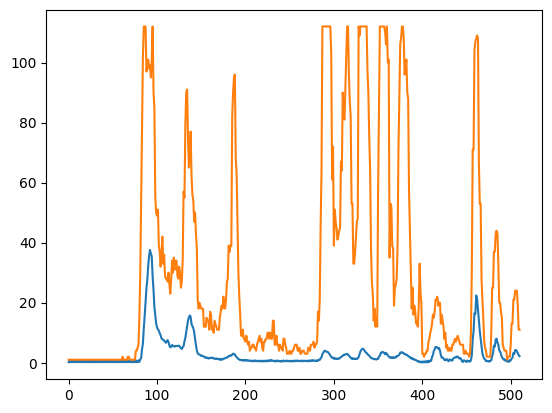

In [3]:
#get the mean signal of the volume
mean_signal = np.mean(data, axis=(1,2))
#get the maximum signal of the volume
max_signal = np.max(data, axis=(1,2))

#plot the mean signal
plt.plot(mean_signal)
#plot the maximum signal
plt.plot(max_signal)

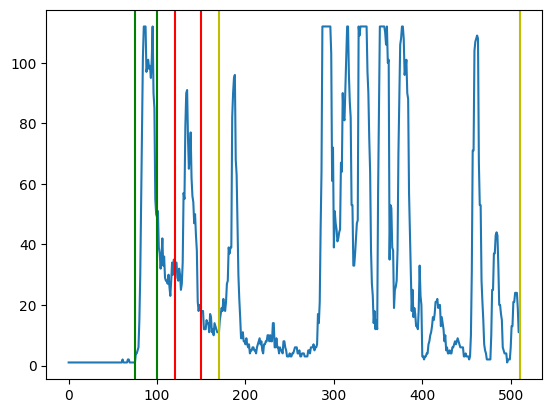

In [4]:
#gate1

gate1 = (75, 100)
gate2 = (120, 150)
gate3 = (170,data.shape[0]-1)

#plot the max_signal and a vertical line at the gates start and end, gate 1 in yellow, gate 2 in red
plt.plot(max_signal)
plt.axvline(gate1[0], color='g')
plt.axvline(gate1[1], color='g')
plt.axvline(gate2[0], color='r')
plt.axvline(gate2[1], color='r')
plt.axvline(gate3[0], color='y')
plt.axvline(gate3[1], color='y')

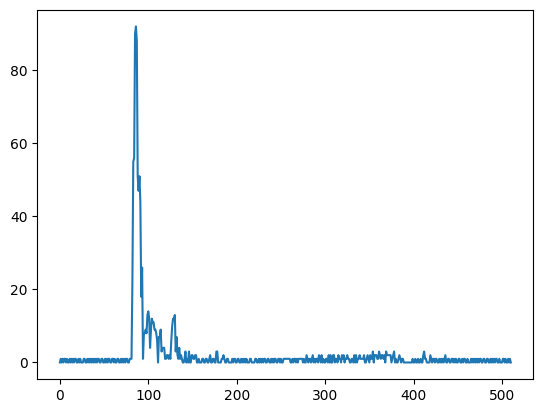

In [5]:
index = (20,15)

plt.plot(data[:,index[0],index[1]])

In [6]:
signal = data[:,index[0],index[1]]

#get the gated data
gated_data = signal[gate1[0]:gate1[1]]

#get the index of the max of the gated data
max_gated_data_index = np.argmax(gated_data, axis=0)

rolled = np.roll(signal, -max_gated_data_index)

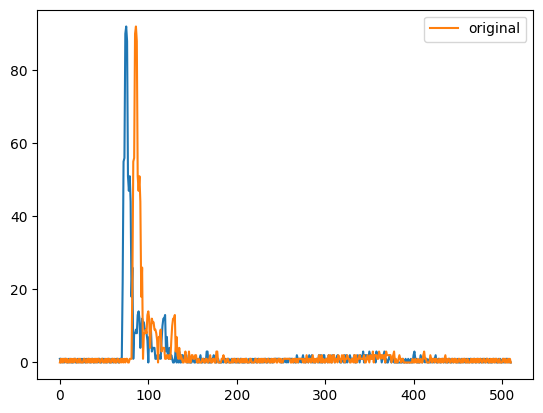

In [7]:
plt.plot(rolled)
plt.plot(signal, label='original')
plt.legend()

In [19]:
def align(data,gate):
    #now do it for the whole volume
    rolled_data = np.zeros_like(data)
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            signal = data[:,i,j]
            gated_data = signal[gate1[0]:gate1[1]]
            max_gated_data_index = np.argmax(gated_data, axis=0)
            rolled = np.roll(signal, -max_gated_data_index)
            rolled_data[:,i,j] = rolled
    return rolled_data

In [20]:
aligned_data = align(data,gate1)

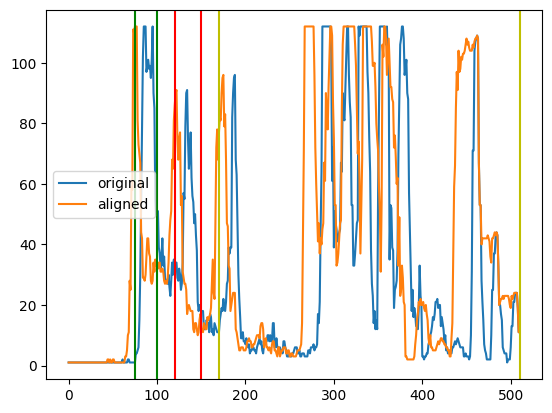

In [21]:
#get the mean signal of the volume
s1 = np.max(data, axis=(1,2))
#get the maximum signal of the volume
s2 = np.max(aligned_data, axis=(1,2))


plt.figure()

#plot the mean signal
plt.plot(s1, label='original')
#plot the maximum signal
plt.plot(s2, label='aligned')

#gate1

gate1 = (75, 100)
gate2 = (120, 150)
gate3 = (170,data.shape[0]-1)

#plot the max_signal and a vertical line at the gates start and end, gate 1 in yellow, gate 2 in red
plt.axvline(gate1[0], color='g')
plt.axvline(gate1[1], color='g')
plt.axvline(gate2[0], color='r')
plt.axvline(gate2[1], color='r')
plt.axvline(gate3[0], color='y')
plt.axvline(gate3[1], color='y')
plt.legend()

In [22]:
mean_signal = np.mean(aligned_data, axis=(1,2))

#get the index of the max of the mean signal

max_mean_signal_index = np.argmax(mean_signal, axis=0)

print(max_mean_signal_index)

75


In [23]:
#save aligned data as a tiff
tiff.imsave(output_folder / 'aligned_data.tif', aligned_data)

C:\Users\alberto.vicente\AppData\Local\Temp\ipykernel_24452\1667194118.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(output_folder / 'aligned_data.tif', aligned_data)
